In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm 

# Import data

Chargement des corrdonnées du museau 

In [2]:
X_snout = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/snout_coords.csv",  header=None)
X_snout


,0,1,2,3
0,0.182095,0.564310,0.168614,0.233524
1,0.183028,0.535635,0.172195,0.265240
2,0.183667,0.513194,0.175082,0.289693
3,0.184043,0.496454,0.177336,0.307510
4,0.184191,0.484884,0.179015,0.319314
...,...,...,...,...
1370,0.225228,0.723106,0.152929,0.182148
1371,0.224485,0.714644,0.142189,0.174504
1372,0.227563,0.707101,0.129164,0.165155
1373,0.234720,0.700602,0.113701,0.153982


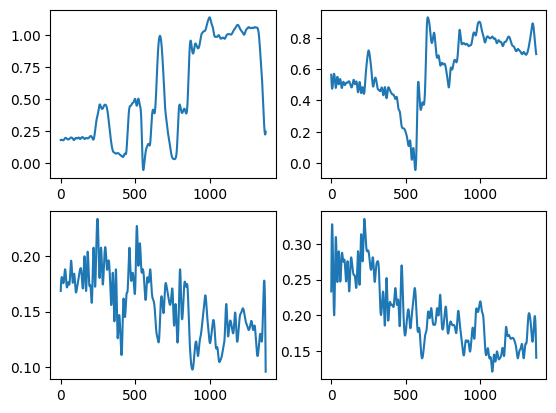

In [3]:
plt.subplot(2,2,1)
plt.plot(range(0,len(X_snout)) , X_snout[0])
plt.subplot(2,2,2)
plt.plot(range(0,len(X_snout)) ,X_snout[1])
plt.subplot(2,2,3)
plt.plot(range(0,len(X_snout)) ,X_snout[2])
plt.subplot(2,2,4)
plt.plot(range(0,len(X_snout)) ,X_snout[3])


# Train model

In [4]:
scores = list()
models = list()
for n_components in range(2, 5): # test 2 to 5 n components
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.GaussianHMM(n_components=n_components, random_state=idx,covariance_type = "diag", n_iter=50)
        model.fit(X_snout)
        models.append(model)
        scores.append(model.score(X_snout))
        # print(f'Converged: {model.monitor_.converged}\t\t'f'Score: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
# print(f'The best model had a score of {max(scores)} and 'f'{model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
Z = model.predict(X_snout)

Model is not converging.  Current: 9428.802936203825 is not greater than 9428.806376757311. Delta is -0.0034405534861434717
Model is not converging.  Current: 9499.130612986799 is not greater than 9499.38556844748. Delta is -0.25495546068123076


In [5]:
print(model.means_)
print(model.covars_)

[[1.00660822 0.77844216 0.13103582 0.16620582]
 [0.16069508 0.48429108 0.17156102 0.24984964]
 [0.35778976 0.34095324 0.1892782  0.22408148]
 [0.37768096 0.68978909 0.15484777 0.19046915]]
[[[0.00381021 0.         0.         0.        ]
  [0.         0.00243876 0.         0.        ]
  [0.         0.         0.00025863 0.        ]
  [0.         0.         0.         0.00056493]]

 [[0.00306385 0.         0.         0.        ]
  [0.         0.00145247 0.         0.        ]
  [0.         0.         0.00039074 0.        ]
  [0.         0.         0.         0.0013923 ]]

 [[0.02113388 0.         0.         0.        ]
  [0.         0.04302614 0.         0.        ]
  [0.         0.         0.00033723 0.        ]
  [0.         0.         0.         0.00205171]]

 [[0.0501827  0.         0.         0.        ]
  [0.         0.01316421 0.         0.        ]
  [0.         0.         0.00034709 0.        ]
  [0.         0.         0.         0.0002369 ]]]


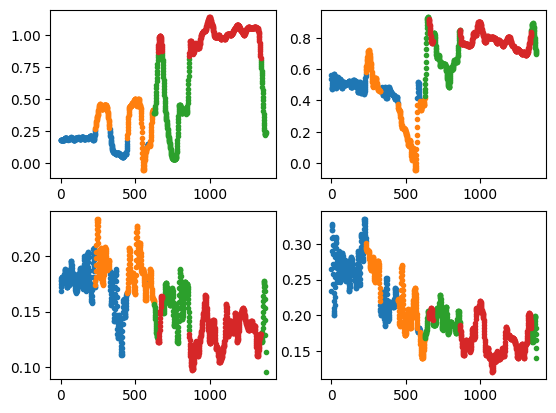

In [6]:
states= pd.unique(Z)

plt.subplot(2,2,1)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_snout[0][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,2)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_snout[1][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,3)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_snout[2][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,4)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_snout[3][(Z == i)]
    plt.plot(x, y, '.')


In [7]:
df=pd.DataFrame({'states':Z})
# make the same thing for the others 
df.to_csv("E:/UQAM/Recherche/Thomas/data/snout_coords_hmmstates.csv")